# Navie-Bayes

This notebook will apply the Naive Bayes algorithm to a previously preprocessed dataset. Context: we are ttrying to predict wether a person has diabetes or not based on some features we have in the dataset obtained from Kaggle.


In [1]:
# All the imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

# Train on data. No parameters to adjust
from sklearn.naive_bayes import GaussianNB       ### Because BMI is continuous
from sklearn.model_selection import (
    StratifiedKFold, 
    cross_val_score, 
    train_test_split
)
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix

from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay,\
                 f1_score

In [2]:
# Load the dataset
try:
    diabetes_df = pd.read_csv('../preprocessing_scripts/Data_preprocessed_10000.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    diabetes_df = None
    print("File not found. Please check the file path.")

Dataset loaded successfully.


In [3]:
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,1.0,-1.071593,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
1,0.0,0.0,0.0,1.0,0.628607,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0
2,0.0,1.0,1.0,1.0,-0.319133,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0
3,0.0,0.0,1.0,1.0,0.017644,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0
4,1.0,1.0,0.0,1.0,2.311887,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0


In [4]:
print("Shape of the dataset:", diabetes_df.shape)
print("Type of columns in the dataset:")
print(diabetes_df.dtypes)

Shape of the dataset: (9939, 22)
Type of columns in the dataset:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


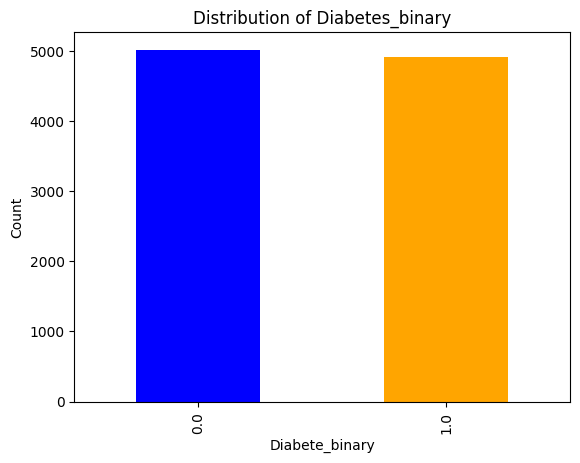

In [ ]:
diabetes_df['Diabetes_binary'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabete_binary')
plt.ylabel('Count')
plt.show()

In [6]:
X = diabetes_df.drop(columns=['Diabetes_binary'])
y = diabetes_df['Diabetes_binary']

In [7]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (9939, 21)
Shape of y: (9939,)


Text(0.5, 1.0, 'Correlation Between Features')

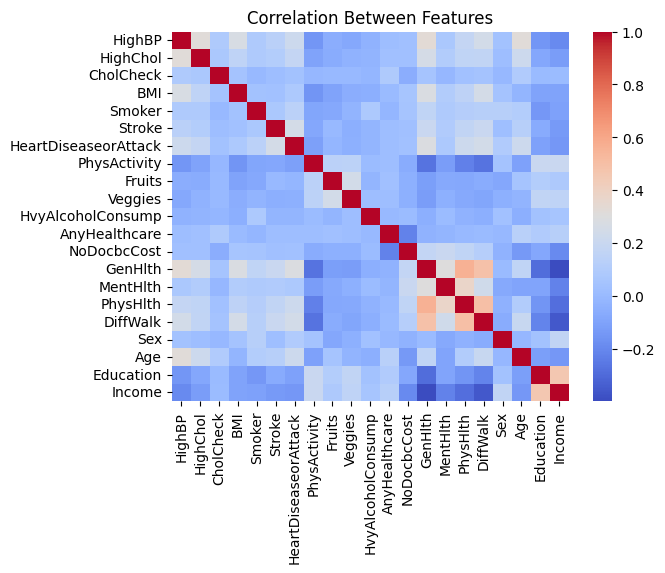

In [8]:
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Between Features')

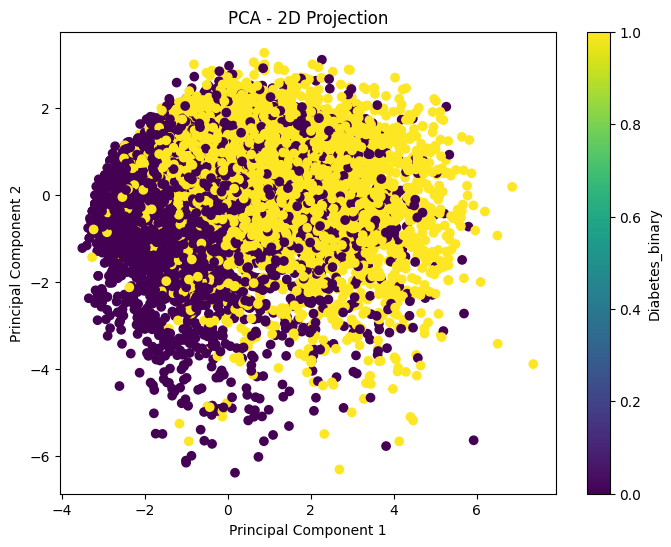

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(columns=['BMI']))  # Standardize features
X_scaled = pd.DataFrame(X_scaled, columns=X.columns.drop('BMI'))  # Convert back to DataFrame

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled) 

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # Color by class labels 'y'
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.colorbar(label='Diabetes_binary')
plt.show()

In [10]:
# OBS: deleted 'random_state' parameter since its use is no longer needed
cv = StratifiedKFold(
    n_splits = 10, 
) 

gnb = GaussianNB()
cv_scores = cross_val_score(
    gnb,
    X = X,
    y = y,
    cv = cv
)
np.mean(cv_scores)  # Mean score of the executions

np.float64(0.7198908455769866)

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73      5020
         1.0       0.72      0.70      0.71      4919

    accuracy                           0.72      9939
   macro avg       0.72      0.72      0.72      9939
weighted avg       0.72      0.72      0.72      9939



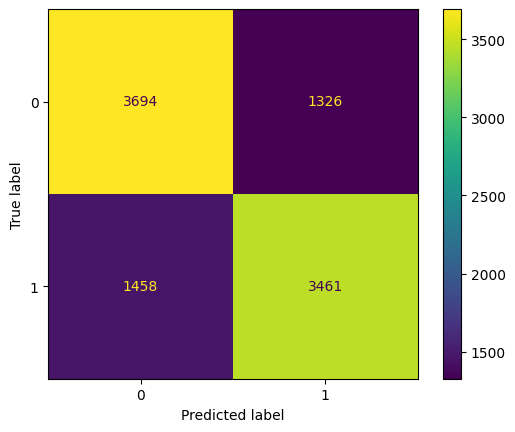

In [11]:
predicted = cross_val_predict(
    estimator = GaussianNB(), 
    X = X,
    y = y,  
    cv = cv
)  
print(classification_report(y, predicted))  # Classification report
ConfusionMatrixDisplay(confusion_matrix(y, predicted)).plot()

***
## Adjusting probability threshold

In this section, we will adjust the probability threshold for the Naive Bayes classifier. The default threshold is 0.5, but we can change it to optimize the model's performance.

- Train 70% of the data
- Test 30% of the data
- Using random_state=42
- Stratify the data

In [12]:
(X_train, X_test,  y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [13]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6957, 21)
Shape of X_test: (2982, 21)
Shape of y_train: (6957,)
Shape of y_test: (2982,)


In [14]:
def filterp(threshold,ProbClass1):
    """Given a threshold "threshold" and a set of probabilities of belonging to class 1 "ProbClass1", 
    return predictions.""" 
    y = np.zeros(ProbClass1.shape[0])
    for i,v in enumerate(ProbClass1):
        if ProbClass1[i]>threshold:
            y[i]=1
    return y  

In [15]:
clf = GaussianNB()
lth=[]

# We do a 10-fold cross-validation with 10 iterations
kf = StratifiedKFold(
    n_splits = 20, 
    shuffle = True, 
    random_state = 42
)

In [16]:
# Now we compute the threshold by iterating the data we have
for train_index, test_index in kf.split(X_train, y_train):
    
    X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]

    # Train with the training data of the iteration 
    clf.fit(X_train2, y_train2)
    # Obtaining probability predictions for test data of the iteration
    probs = clf.predict_proba(X_test2)
    # Collect probabilities of belonging to class 1
    ProbClass1 = probs[:,1]
    # Sort probabilities and generate pairs (threshold, f1-for-that-threshold) 
    res = np.array([[th,f1_score(y_test2,filterp(th,ProbClass1),pos_label=1)] for th in np.sort(ProbClass1)])
    """
    # Uncomment the following lines if you want to plot at each iteration how f1-score 
    # evolves increasing the threshold 
    plt.plot(res[:,0],res[:,1])
    plt.show()
    """
    
    # Find the threshold that has maximum value of f1-score
    maxF = np.max(res[:,1])
    pl = np.argmax(res[:,1])
    optimal_threshold = res[pl,0]
    
    # Store the optimal threshold found for the current iteration
    lth.append(optimal_threshold)

# Compute the average threshold for all 10 iterations    
threshold = np.mean(lth)
print(f"Selected threshold in 10-fold cross validation: {np.round(threshold, 6)}")

Selected threshold in 10-fold cross validation: 0.111426


              precision    recall  f1-score   support

         0.0       0.82      0.60      0.69      1506
         1.0       0.68      0.86      0.76      1476

    accuracy                           0.73      2982
   macro avg       0.75      0.73      0.73      2982
weighted avg       0.75      0.73      0.73      2982



Text(0.5, 1.0, 'Confusion Matrix in test set for threshold 0.111426')

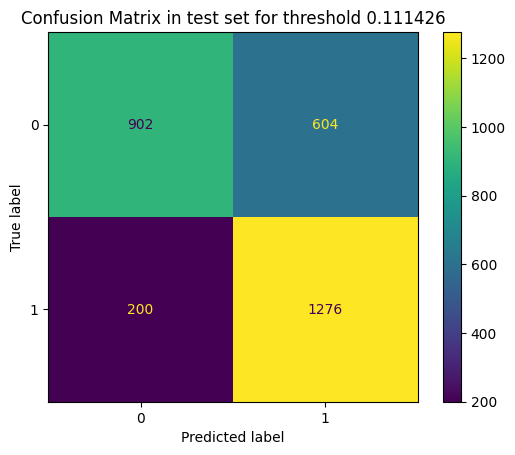

In [ ]:
# Train a classifier with the whole training data 
clf = GaussianNB()
clf.fit(X_train, y_train)

# Obtain probabilities for data on test set
probs = clf.predict_proba(X_test)

# Generate predictions using probabilities and threshold found on 10 folds cross-validation
prediction = filterp(threshold,probs[:,1])

print(classification_report(y_test, prediction))
# Ignore warnings explaining that in some iterations f1 score is 0

ConfusionMatrixDisplay(confusion_matrix(y_test, prediction)).plot()
plt.title(f'Confusion Matrix in test set for threshold {np.round(threshold, 6)}')

Text(0.5, 1.0, 'ROC curve in test set for threshold 0.111426')

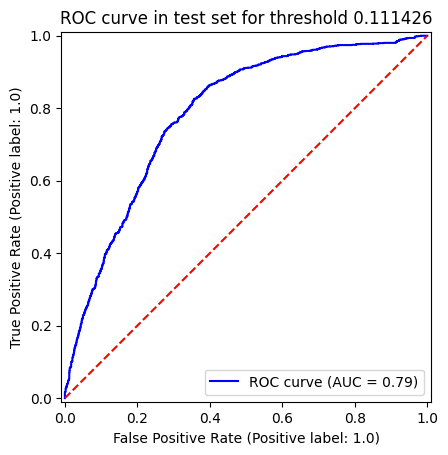

In [18]:
RocCurveDisplay.from_estimator(
    clf, 
    X_test, 
    y_test, 
    name = 'ROC curve', 
    color = 'blue'
)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title(f'ROC curve in test set for threshold {np.round(threshold, 6)}')

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73      1506
         1.0       0.73      0.71      0.72      1476

    accuracy                           0.72      2982
   macro avg       0.72      0.72      0.72      2982
weighted avg       0.72      0.72      0.72      2982

[[1111  395]
 [ 433 1043]]


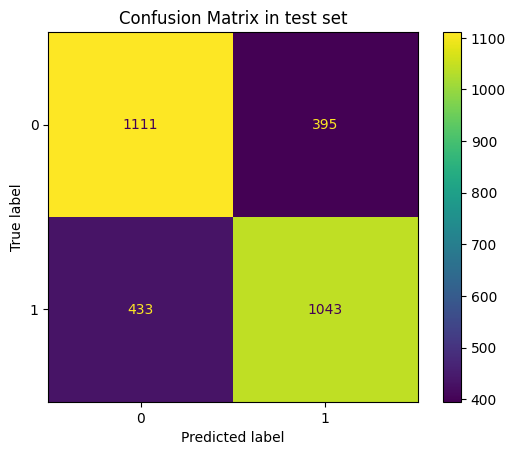

In [19]:
clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))
ConfusionMatrixDisplay(confusion_matrix(y_test, prediction)).plot()
plt.title('Confusion Matrix in test set')
print(confusion_matrix(y_test, prediction))

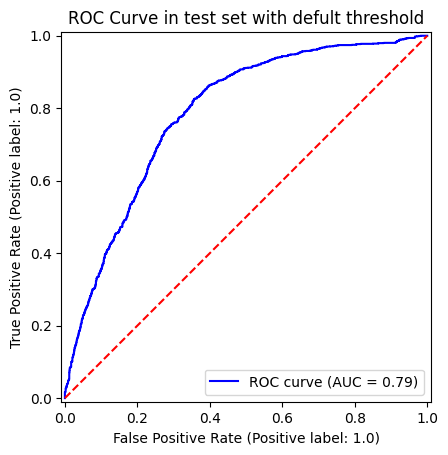

In [20]:
RocCurveDisplay.from_estimator(
    clf, 
    X_test, 
    y_test, 
    name = "ROC curve",
    color = "blue"
)
plt.title('ROC Curve in test set with defult threshold')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')